In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import re
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from scipy.stats import randint
from io import StringIO
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#veritabanının eklenmesi
df = pd.DataFrame()
df = pd.read_csv("pre-processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272216 entries, 0 to 272215
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  272216 non-null  int64 
 1   Rating      272216 non-null  int64 
 2   Review      272203 non-null  object
 3   URL         272216 non-null  object
dtypes: int64(2), object(2)
memory usage: 8.3+ MB


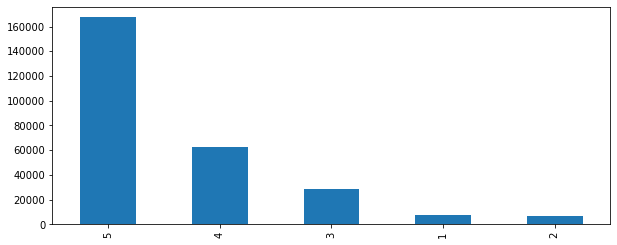

In [3]:
plt.figure(figsize=(10,4))
df.Rating.value_counts().plot(kind='bar');

In [4]:
def draw_conf(conf_mat, title):
    fig, ax = plt.subplots(figsize=(8,8))
    
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
                xticklabels={5,4,3,2,1},
                yticklabels={5,4,3,2,1})
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title+' \n', size=16);

In [5]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2))

#tweet vectorization with TfidfVectorizer
features = tfidf.fit_transform((df.Review).values.astype('U'))
labels = df.Rating

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.3,random_state = 0)

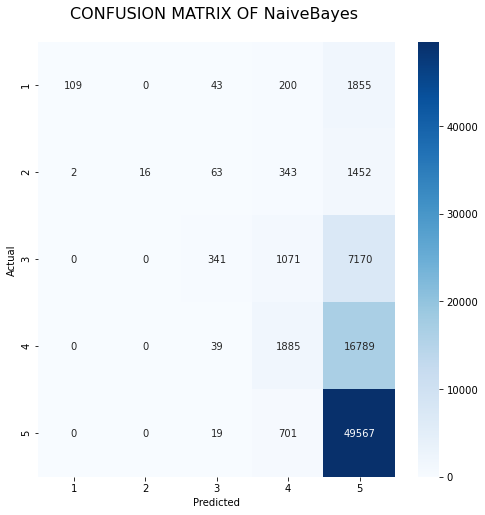

In [6]:
#tweet vectorization with countvectorizer
#t=CountVectorizer()
#features = t.fit_transform(df.Review.values.astype('U'))
#labels = df.Rating

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state = 44)

#modelin eğitilmesi
nb=MultinomialNB()
nb.fit(X_train,Y_train)
from sklearn.metrics import classification_report,confusion_matrix
preds=nb.predict(X_test)
conf_mat = confusion_matrix(Y_test, preds)


draw_conf(conf_mat, 'CONFUSION MATRIX OF NaiveBayes') 

In [7]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           1       0.98      0.05      0.09      2207
           2       1.00      0.01      0.02      1876
           3       0.68      0.04      0.08      8582
           4       0.45      0.10      0.16     18713
           5       0.65      0.99      0.78     50287

    accuracy                           0.64     81665
   macro avg       0.75      0.24      0.23     81665
weighted avg       0.62      0.64      0.53     81665



In [8]:
nb_scores = cross_val_score(nb, features, labels, cv=5)
nb_scores

array([0.62341121, 0.5998751 , 0.5432838 , 0.59234429, 0.62053891])

In [9]:
nb_scores.mean()

0.5958906621192384

In [10]:
#5 fold cross validation in a for loop
#X = df.Review
#Y = df.Rating
#
#X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.3, random_state = 44)
#
#skf = StratifiedKFold(n_splits=5)
#for train_index, test_index in skf.split(X, Y):
#    X_train2, X_test2 = X[train_index], X[test_index]
#    Y_train2, Y_test2 = Y[train_index], Y[test_index]
#    t2 = CountVectorizer()
#    X_train2_dtm = t2.fit_transform(X_train2.values.astype('U'))
#    X_test2_dtm = t2.transform(X_test2.values.astype('U'))
#    nb2 = MultinomialNB()
#    nb2.fit(X_train2_dtm, Y_train2)
#    preds2 = nb2.predict(X_test2_dtm)
#    conf_mat2 = confusion_matrix(Y_test2, preds2)
#    draw_conf(conf_mat2, 'CONFUSION MATRIX OF NaiveBayes')
#    print(classification_report(Y_test2,preds2))

In [11]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=1)
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,target_names=['1', '2', '3', '4', '5']))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1       0.66      0.41      0.51      2131
           2       0.47      0.14      0.22      1899
           3       0.40      0.22      0.28      8476
           4       0.42      0.31      0.35     18886
           5       0.72      0.87      0.79     50273

    accuracy                           0.65     81665
   macro avg       0.53      0.39      0.43     81665
weighted avg       0.61      0.65      0.61     81665



In [12]:
svc_scores = cross_val_score(svc, features, labels, cv=5)
svc_scores

array([0.61281317, 0.5595026 , 0.51666881, 0.58960748, 0.61060191])

In [13]:
svc_scores.mean()

0.577838793552281

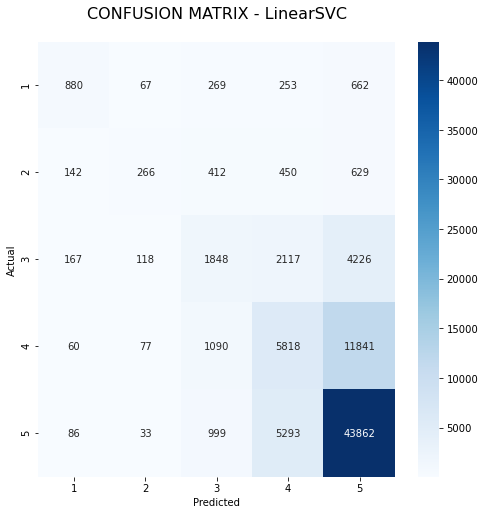

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['1', '2', '3', '4', '5'], 
            yticklabels=['1', '2', '3', '4', '5'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [15]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,target_names=['1', '2', '3', '4', '5']))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1       0.66      0.39      0.49      2175
           2       0.41      0.07      0.13      1891
           3       0.44      0.14      0.21      8529
           4       0.43      0.27      0.33     18781
           5       0.70      0.92      0.80     50289

    accuracy                           0.65     81665
   macro avg       0.53      0.36      0.39     81665
weighted avg       0.61      0.65      0.60     81665



C:\Users\ysn_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr_scores = cross_val_score(lr, features, labels, cv=5)
lr_scores

C:\Users\ysn_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ysn_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.63307251, 0.59785464, 0.54501038, 0.60200577, 0.63266168])

In [17]:
lr_scores.mean()

0.6021209960049413

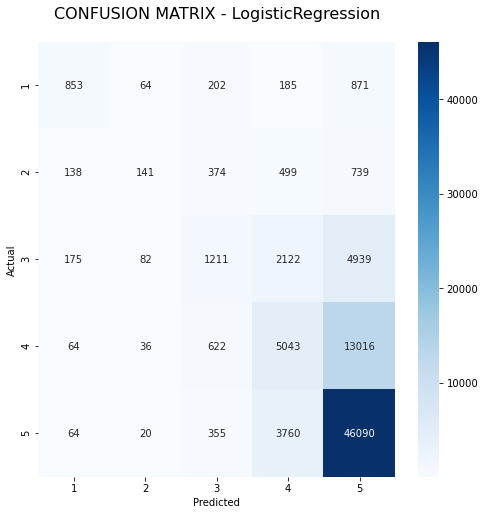

In [18]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['1', '2', '3', '4', '5'], 
            yticklabels=['1', '2', '3', '4', '5'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LogisticRegression\n", size=16);

In [22]:
print("accuracy of naive bayes         with 5 fold cross validation ",nb_scores.mean(),
      "\naccuracy of linear svm          with 5 fold cross validation ",svc_scores.mean(),
      "\naccuracy of logistic regression with 5 fold cross validation ",lr_scores.mean())

accuracy of naive bayes         with 5 fold cross validation  0.5958906621192384 
accuracy of linear svm          with 5 fold cross validation  0.577838793552281 
accuracy of logistic regression with 5 fold cross validation  0.6021209960049413
